Relax Inc. makes productivity and project management software that's popular with both individuals and teams.
<br>Founded by several former Facebook employees, it's considered a great company to work for.

To complete this challenge:

Download the files for your take home challenge.
Work on it and submit a link to a GitHub repository containing your solution.


The  data  is  available  as  two  attached  CSV  files:
+ takehome_user_engagement. csv
+ takehome_users . csv

The  data  has  the  following  two  tables:

1]  A  user  table  ( "takehome_users" )  with  data  on  12,000  users  who  signed  up  for  the
product  in  the  last  two  years.   This  table  includes:
-  name:  the  user's  name
-  object_id:   the  user's  id
-  email:  email  address
- creation_source:   how  their  account  was  created.  This  takes  on  one of  5  values:
   +  PERSONAL_PROJECTS:  invited  to  join  another  user's personal  workspace
   +  GUEST_INVITE:  invited  to  an  organization  as  a  guest(limited  permissions)
   +  ORG_INVITE:  invited  to  an  organization  (as  a  full  member)
   +  SIGNUP:  signed  up  via  the  website
   +  SIGNUP_GOOGLE_AUTH:  signed  up  using  Google
Authentication  (using  a  Google  email  account  for  their  login
id)
-  creation_time:  when  they  created  their  account
-  last_session_creation_time:   unix  timestamp  of  last  login
-  opted_in_to_mailing_list:  whether  they  have  opted  into  receiving
marketing  emails
-  enabled_for_marketing_drip:  whether  they  are  on  the  regular
marketing  email  drip
-  org_id:   the  organization  (group  of  users)  they  belong  to
-  invited_by_user_id:   which  user  invited  them  to  join  (if  applicable).

2]  A  usage  summary  table  ( "takehome_user_engagement" )  that  has  a  row  for  each  day
that  a  user  logged  into  the  product.
<br>Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven­day  period ,  *identify  which  factors  predict  future  user
adoption*.

We  suggest  spending  1­2  hours  on  this,  but  you're  welcome  to  spend  more  or  less.
Please  send  us  a  brief  writeup  of  your  findings  (the  more  concise,  the  better  ­­  no  more
than  one  page),  along  with  any  summary  tables,  graphs,  code,  or  queries  that  can  help
us  understand  your  approach.  Please  note  any  factors  you  considered  or  investigation
you  did,  even  if  they  did  not  pan  out.  Feel  free  to  identify  any  further  research  or  data
you  think  would  be  valuable.

In [1]:
# load basic libraries
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
df = pd.read_csv('takehome_users.csv', encoding='ISO-8859–1')
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
df.shape

(12000, 10)

In [4]:
df.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [5]:
# convert creation_time datatype to int64
df.creation_time = pd.to_datetime(df.creation_time, format='%Y-%m-%d')
df.creation_time = df.creation_time.astype(np.int64)

In [6]:
df2= pd.read_csv('takehome_user_engagement.csv')
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
# convert time_stamp to datetime type
df2.time_stamp = pd.to_datetime(df2.time_stamp, format='%Y-%m-%d')

In [8]:
df2.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [9]:
# calculte total visit time within 7 days
new_df2 = df2.groupby('user_id').rolling('7D', on='time_stamp').visited.sum()

In [10]:
new_df2 = pd.DataFrame(new_df2).reset_index()

In [11]:
new_df2.head(10)

,user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,1.0
1,2,2013-11-15 03:45:04,1.0
2,2,2013-11-29 03:45:04,1.0
3,2,2013-12-09 03:45:04,1.0
4,2,2013-12-25 03:45:04,1.0
5,2,2013-12-31 03:45:04,2.0
6,2,2014-01-08 03:45:04,1.0
7,2,2014-02-03 03:45:04,1.0
8,2,2014-02-08 03:45:04,2.0
9,2,2014-02-09 03:45:04,3.0


In [12]:
# chech how many user is the adopted_user
len(new_df2[new_df2.visited>=3].user_id.unique())

1602

In [13]:
new_df2['adopted_user'] = np.where(new_df2.visited>=3, 1,0)

In [14]:
new_df2.head(10)

,user_id,time_stamp,visited,adopted_user
0,1,2014-04-22 03:53:30,1.0,0
1,2,2013-11-15 03:45:04,1.0,0
2,2,2013-11-29 03:45:04,1.0,0
3,2,2013-12-09 03:45:04,1.0,0
4,2,2013-12-25 03:45:04,1.0,0
5,2,2013-12-31 03:45:04,2.0,0
6,2,2014-01-08 03:45:04,1.0,0
7,2,2014-02-03 03:45:04,1.0,0
8,2,2014-02-08 03:45:04,2.0,0
9,2,2014-02-09 03:45:04,3.0,1


In [15]:
# groupby user_id, and if the sum of adopted_user equal or bigger than 1 then it's True, else it's False
df_adopted = pd.DataFrame(new_df2.groupby('user_id')['adopted_user'].sum()>=1).reset_index()

In [16]:
df_adopted.head(5)

,user_id,adopted_user
0,1,False
1,2,True
2,3,False
3,4,False
4,5,False


In [17]:
# convert boolean to int64
df_adopted.adopted_user = df_adopted.adopted_user.astype('int64')

In [18]:
df_adopted.head()

,user_id,adopted_user
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [19]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,1398138810000000000,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,1384487104000000000,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,1363734892000000000,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,1369123768000000000,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1358417660000000000,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [20]:
# join df and df_adopted on user_id and object id
final_df = df.join(df_adopted.set_index('user_id'), on ='object_id')

In [21]:
final_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,1398138810000000000,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,1384487104000000000,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,1363734892000000000,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,1369123768000000000,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,1358417660000000000,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [22]:
# check if there's missing value in adopted_user
final_df.adopted_user.value_counts(dropna=False)

0.0    7221
NaN    3177
1.0    1602
Name: adopted_user, dtype: int64

In [23]:
final_df.dtypes

object_id                       int64
creation_time                   int64
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted_user                  float64
dtype: object

In [24]:
# check missing value's data type. as they are all float type so we don't need to do anything
final_df.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted_user                  3177
dtype: int64

In [25]:
# fill NaN with 0
final_df.invited_by_user_id.fillna(0, inplace=True)                                             

In [26]:
# change invited_by_user_id to binary value(1, 0)

final_df.invited_by_user_id = final_df.invited_by_user_id.apply(lambda x: 1 if x != 0
                                                               else x).astype('int64')

In [27]:
final_df.invited_by_user_id.value_counts()

1    6417
0    5583
Name: invited_by_user_id, dtype: int64

In [28]:
# we will not use variable email and name for model building
final_df = final_df.drop(['object_id', 'email', 'name'],axis=1)

In [29]:
final_df.adopted_user.fillna(0, inplace=True)

In [30]:
final_df.describe()

,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
count,1.200000e+04,8.823000e+03,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,1.373981e+18,1.379279e+09,0.249500,0.149333,141.884583,0.534750,0.133500
std,1.871814e+16,1.953116e+07,0.432742,0.356432,124.056723,0.498812,0.340128
min,1.338425e+18,1.338452e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.358285e+18,1.363195e+09,0.000000,0.000000,29.000000,0.000000,0.000000
50%,1.375739e+18,1.382888e+09,0.000000,0.000000,108.000000,1.000000,0.000000
75%,1.390904e+18,1.398443e+09,0.000000,0.000000,238.250000,1.000000,0.000000
max,1.401494e+18,1.402067e+09,1.000000,1.000000,416.000000,1.000000,1.000000


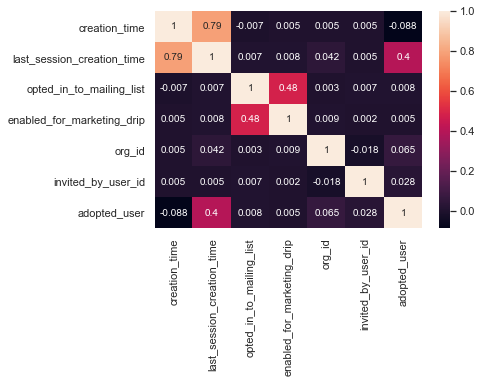

In [31]:
sns.heatmap(round(final_df.corr(),3), annot=True)
plt.show()

we can see variabel creation_time and last_session_creation_time is highly correlated, so we will drop creation_time when build model

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# final_df.org_id = scaler.fit_transform(np.array(final_df.org_id).reshape(-1,1))

In [34]:
final_df.describe()

,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
count,1.200000e+04,8.823000e+03,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,1.373981e+18,1.379279e+09,0.249500,0.149333,141.884583,0.534750,0.133500
std,1.871814e+16,1.953116e+07,0.432742,0.356432,124.056723,0.498812,0.340128
min,1.338425e+18,1.338452e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.358285e+18,1.363195e+09,0.000000,0.000000,29.000000,0.000000,0.000000
50%,1.375739e+18,1.382888e+09,0.000000,0.000000,108.000000,1.000000,0.000000
75%,1.390904e+18,1.398443e+09,0.000000,0.000000,238.250000,1.000000,0.000000
max,1.401494e+18,1.402067e+09,1.000000,1.000000,416.000000,1.000000,1.000000


In [60]:
# final_df = final_df.drop('creation_source', axis=1)


In [61]:
# final_df.dropna(inplace=True)

In [62]:
# final_df.shape

In [63]:
# from sklearn.decomposition import PCA

# Target_pca =final_df[final_df.adopted_user==1]
# non_target_sample = final_df[final_df.adopted_user==0]


# pca=PCA(n_components=2)
# pca1, pca2 = zip(*pca.fit_transform(Target_pca))
# pca3, pca4 = zip(*pca.fit_transform(non_target_sample))

# fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5), sharey=True)

# weights_1 = np.ones_like(final_df[final_df['adopted_user']==1].index)/len(final_df[final_df['adopted_user']==1].index)
# weights_2 = np.ones_like(final_df[final_df['adopted_user']==0].index)/len(final_df[final_df['adopted_user']==0].index)

# ax1.hist(pca1, bins=10, color='r',label='Target', histtype='step', stacked=False, lw=2, weights=weights_1)
# ax1.hist(pca3, bins=10, color='b', label='non-Target', histtype='step', stacked=False, lw=2, weights=weights_2)
# ax1.set_xlabel('PCA Component 1', fontsize=15)
# ax1.set_ylabel('Fraction of observation', fontsize=15)

# ax2.hist(pca2, bins=10, color='r',label='Target', histtype='step', stacked=False, lw=2, weights=weights_1) 
# ax2.hist(pca4, bins=10, color='b', label='non-Target', histtype='step', stacked=False, lw=2, weights=weights_2)
# ax2.set_xlabel('PCA Component 2', fontsize=15)                                                            


# plt.ylim([0,1])
# plt.legend()
# plt.tight_layout()

In [64]:
# fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,6))

# ax1.scatter(pca1,pca2,color='r',alpha=0.2)
# ax1.set_title('Target',fontsize=18)
# ax1.set_ylabel('PCA\nComponent 2',rotation=0,labelpad=55,fontsize=16)
# ax1.set_xlabel('PCA Component 1',fontsize=16)

# ax2.scatter(pca3,pca4,color='k',alpha=0.2)
# ax2.set_title('non-Target',fontsize=18)
# #ax2.set_ylabel('PCA\nComponent 2',rotation=0,labelpad=55,fontsize=16)
# ax2.set_xlabel('PCA Component 1',fontsize=16)

# ax3.scatter(pca1,pca2,color='r',alpha=0.2)
# ax3.scatter(pca3,pca4,color='k',alpha=0.2)

# ax3.set_title('Class Overlap',fontsize=18)
# ax3.set_xlabel('PCA Component 1',fontsize=16)
# plt.tight_layout()

In [35]:
X = final_df.drop(['adopted_user', 'creation_time'], axis=1)
y = final_df.adopted_user

In [36]:
# filter out columns in X that are categorical data
cat_features = X.select_dtypes(include=['object']).columns.tolist()

In [37]:
# list up the index for categorical variables in X 
cat_feature_indices= []

for i, j in enumerate(X.columns):
    if j in cat_features:
        cat_feature_indices.append(i)

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X.to_numpy(), y.ravel(), test_size=0.30, stratify=y, random_state=43)

In [39]:
y_test.sum()/len(y_test)

0.13361111111111112

In [40]:
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold

In [41]:
def trainmodel_cv(model, n):
    
    cv = KFold(n_splits=n)
    for i, (train, test) in enumerate(cv.split(X_train, y_train)):
        X_train_fold, y_train_fold = X_train[train], y_train[train]
        X_test_fold, y_test_fold = X_train[test], y_train[test]
        model.fit(X_train_fold, y_train_fold, cat_features = cat_feature_indices, silent=True)
    
    return model

In [42]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


In [43]:
final_model = trainmodel_cv(CatBoostClassifier(),5)
y_pred = final_model.predict(X_test)
ypred_proba = final_model.predict_proba(X_test)[:,1]


precision, recall, f1score, support = score(y_test, y_pred, pos_label=1,average='binary')
roc_auc = roc_auc_score(y_test, ypred_proba)

accuracy = round(accuracy_score(y_test,y_pred),3)

In [44]:
pd.DataFrame([precision, recall, f1score, roc_auc, accuracy],
                       index=['precison','recall','f1score','roc_auc', 'accuracy']).T

,precison,recall,f1score,roc_auc,accuracy
0,0.723881,0.60499,0.659117,0.9173,0.916


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,  y_pred, labels=[1,0])

array([[ 291,  190],
       [ 111, 3008]])

In [46]:
# get feature importance for catboost on train dataset
from catboost import Pool
train_pool = Pool(X_train, y_train, cat_features=cat_feature_indices)
feature_names = X.columns
#final_model = trainmodel_cv(CatBoostClassifier(iterations=939,  depth=4, learning_rate=0.014877, silent=True), 5)
feature_importances  = final_model.get_feature_importance(train_pool)

feature_df = pd.DataFrame(sorted(zip(feature_importances, feature_names), reverse=True), columns=['Feature Importance', 'Variable'])

In [47]:
feature_df

,Feature Importance,Variable
0,66.386532,last_session_creation_time
1,16.425548,org_id
2,6.886754,creation_source
3,3.972747,enabled_for_marketing_drip
4,3.460905,invited_by_user_id
5,2.867514,opted_in_to_mailing_list


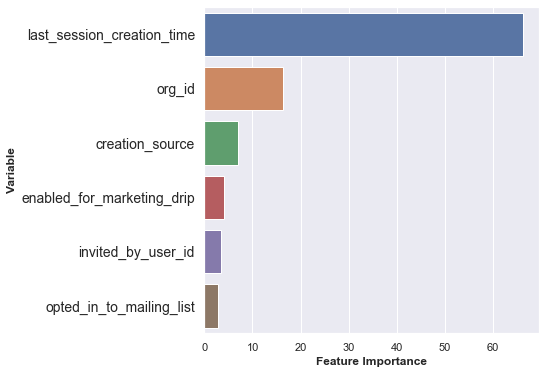

In [48]:
plt.figure(figsize=(6,6))
g = sns.barplot('Feature Importance', 'Variable', data=feature_df)
g.set_xlabel('Feature Importance',fontsize=12,weight='bold')
g.set_ylabel('Variable',size=12,weight='bold')
g.set_yticklabels(g.get_yticklabels(),size=14)
plt.show()

In [49]:
## Try lightgbm

In [50]:
import lightgbm as lgb

In [51]:
X.dtypes

creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id              int64
dtype: object

In [52]:
X.creation_source = X.creation_source.astype('category')

In [53]:
# X_train,X_test,y_train,y_test = train_test_split(X.to_numpy(), y.ravel(), test_size=0.30, stratify=y, random_state=43)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=43)

In [54]:
# d_train = lgb.Dataset(X_train, label=y_train)
# params={}
# params['verbose'] = 0
# params['application'] = 'binary'
# params['feature_name'] = 'auto'
# params['categorical_feature'] = 'auto'
# #params['metric'] = 'accuracy'

# cv_results = lgb.cv(params, d_train, nfold=5, num_boost_round=100, metrics='binary_error')

In [55]:
# print(round(1-cv_results['binary_error-mean'][-1],3))

In [56]:
from sklearn.metrics import classification_report

In [57]:
model = lgb.LGBMClassifier(loss_function= 'Logloss', custom_metric=['Accuracy','AUC'],eval_metric='Recall')
model.fit(X_train, y_train, eval_set=(X_test, y_test), feature_name='auto', categorical_feature = 'auto', verbose=10)

expected_y  = y_test
y_pred = model.predict(X_test)

[10]	valid_0's binary_logloss: 0.23426
[20]	valid_0's binary_logloss: 0.211663
[30]	valid_0's binary_logloss: 0.206708
[40]	valid_0's binary_logloss: 0.206039
[50]	valid_0's binary_logloss: 0.205695
[60]	valid_0's binary_logloss: 0.20656
[70]	valid_0's binary_logloss: 0.207932
[80]	valid_0's binary_logloss: 0.209172
[90]	valid_0's binary_logloss: 0.210053
[100]	valid_0's binary_logloss: 0.211351


In [58]:
print(classification_report(expected_y, y_pred))
print(confusion_matrix(expected_y, y_pred, labels=[1,0]))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      3119
         1.0       0.73      0.61      0.67       481

    accuracy                           0.92      3600
   macro avg       0.84      0.79      0.81      3600
weighted avg       0.91      0.92      0.92      3600

[[ 294  187]
 [ 106 3013]]


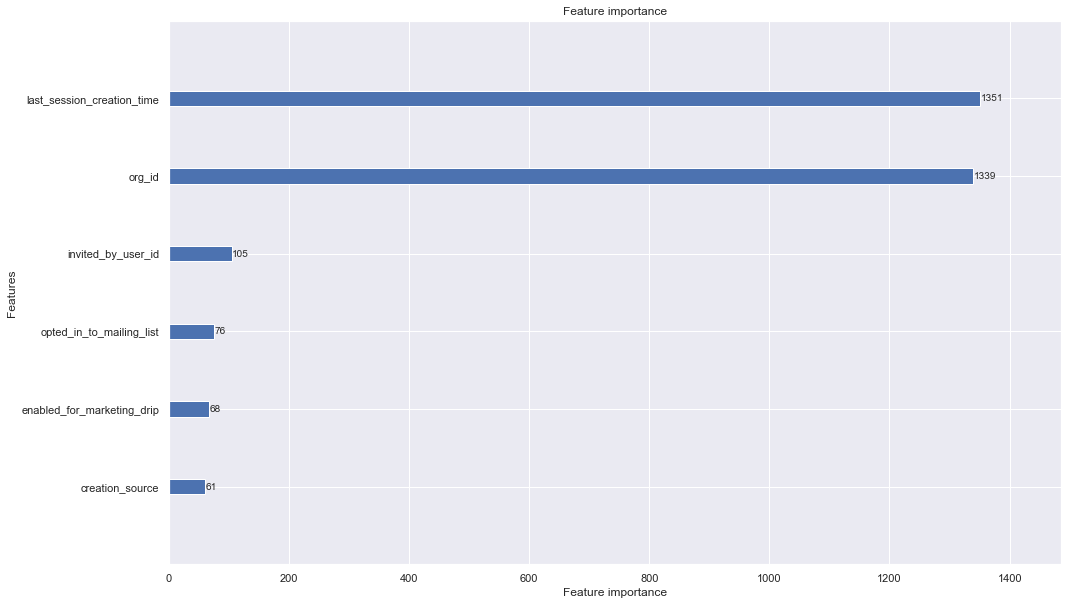

In [59]:
# feature importance for lighgbm
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(16, 10))
plot_importance(model,ax=ax)
plt.show()

<b>As LightGBM has better Recall and Accuracy than CatBoost, we will use model LightGBM as our model. We can see that top 3 important factors to predict future user adoption are last_session_creation_time, org_id, invited_by_user_id.
<br>Those who has very recent last log in, belong to certain type of group, invited by existing users are likely to be the new adopted users